In [0]:
import json
import keras
from pprint import pprint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def jsonFileToData(path):
  json_file = open(path,'rb')
  json_str = json_file.read().decode(errors='replace')
  data1 = json.loads(json_str)

  texts = list(data1['text'].values())
  labels = list(data1['sentiment'].values())
  
  maxlen = 100  # We will cut reviews after 100 words
  training_samples = 200  # We will be training on 200 samples
  validation_samples = 10000  # We will be validating on 10000 samples
  max_words = 10000  # We will only consider the top 10,000 words in the dataset

  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(texts)
  sequences = tokenizer.texts_to_sequences(texts)

  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  
  data = pad_sequences(sequences, maxlen=maxlen)

  label = []
  for lbl in labels:
    if lbl.lower() == 'positive':
      label.append(1)
    elif lbl.lower() == 'negative':
      label.append(0)
    else:
      label.append(2)
  
  print('Shape of data tensor:', data.shape)
  print('Shape of label tensor:', len(label))
  '''
  X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)
  print('Shape of X_train: ', X_train.shape)
  print('Shape of X_test: ', X_test.shape)
  print('Shape of y_train: ', y_train.shape)
  print('Shape of y_test: ', y_test.shape)
  '''
  return data, label

In [22]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [23]:
import glob
fileList = glob.glob('drive/My Drive/INFO7374_Assignment_3/data/*.json')
for file in fileList:
    if file == 'drive/My Drive/INFO7374_Assignment_3/Team5_Microsoft.json' :
      fileList.remove(file)
for file in fileList:
    print(file)

drive/My Drive/INFO7374_Assignment_3/data/Team10_NVIDIA.json
drive/My Drive/INFO7374_Assignment_3/data/Team3_Facebook.json
drive/My Drive/INFO7374_Assignment_3/data/Team6_Tesla.json
drive/My Drive/INFO7374_Assignment_3/data/Team5_Microsoft.json
drive/My Drive/INFO7374_Assignment_3/data/Team12_Chevron.json
drive/My Drive/INFO7374_Assignment_3/data/Team2_Amazon.json
drive/My Drive/INFO7374_Assignment_3/data/Team7_Walmart.json
drive/My Drive/INFO7374_Assignment_3/data/Team11_Boeing.json
drive/My Drive/INFO7374_Assignment_3/data/Team1_Google.json
drive/My Drive/INFO7374_Assignment_3/data/Team9_GoldmanSachs.json
drive/My Drive/INFO7374_Assignment_3/data/Team4_Netflix.json
drive/My Drive/INFO7374_Assignment_3/data/Team8_Kroger.json


In [0]:
fileList.remove('drive/My Drive/INFO7374_Assignment_3/data/Team11_Boeing.json')
fileList.remove('drive/My Drive/INFO7374_Assignment_3/data/Team9_GoldmanSachs.json')
fileList.remove('drive/My Drive/INFO7374_Assignment_3/data/Team8_Kroger.json')

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    y_pred = np.argmax(y_pred, axis = -1)
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
import ntpath
def plotTransferedMatrix(filelist):
  for file in filelist:
    filename = ntpath.basename(file)[:-5]
    print(filename)

    data_temp, label_temp = jsonFileToData(file)
    preds = loaded_model.predict(data_temp)
    plot_confusion_matrix(label_temp, preds,normalize=False,title=filename+' Unnormalized')
    plot_confusion_matrix(label_temp, preds,normalize=True, title=filename+' Normalized')

Team10_NVIDIA
Found 1604 unique tokens.
Shape of data tensor: (105, 100)
Shape of label tensor: 105
Confusion matrix, without normalization
[[ 0 18  6]
 [ 0 23 14]
 [ 0 27 17]]
Normalized confusion matrix
[[0.         0.75       0.25      ]
 [0.         0.62162162 0.37837838]
 [0.         0.61363636 0.38636364]]
Team3_Facebook
Found 1627 unique tokens.
Shape of data tensor: (149, 100)
Shape of label tensor: 149
Confusion matrix, without normalization
[[ 0  5  4]
 [ 0 35 16]
 [ 0 49 40]]
Normalized confusion matrix
[[0.         0.55555556 0.44444444]
 [0.         0.68627451 0.31372549]
 [0.         0.5505618  0.4494382 ]]
Team6_Tesla
Found 1554 unique tokens.
Shape of data tensor: (181, 100)
Shape of label tensor: 181
Confusion matrix, without normalization
[[ 0  9  5]
 [ 0 39 19]
 [ 0 68 41]]
Normalized confusion matrix
[[0.         0.64285714 0.35714286]
 [0.         0.67241379 0.32758621]
 [0.         0.62385321 0.37614679]]
Team5_Microsoft
Found 1689 unique tokens.
Shape of data ten

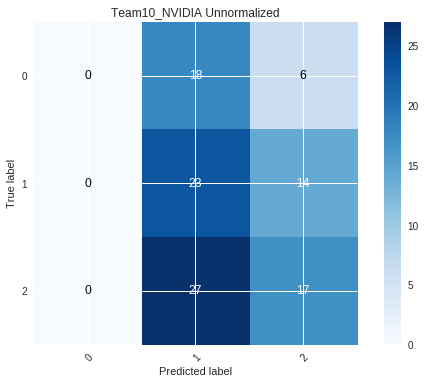

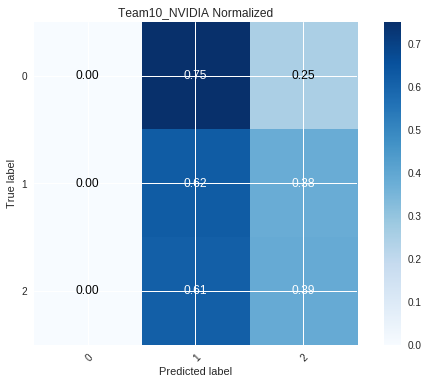

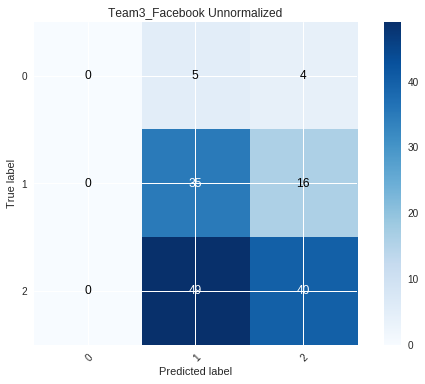

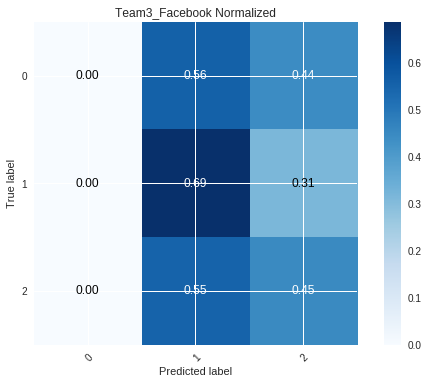

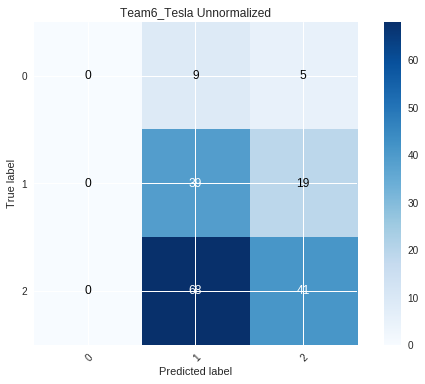

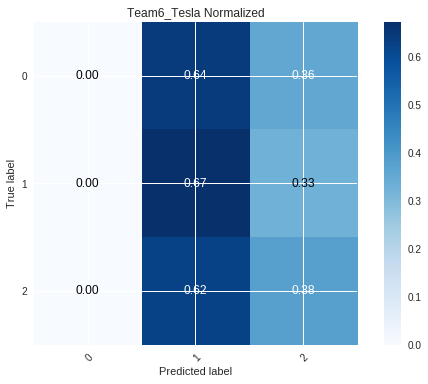

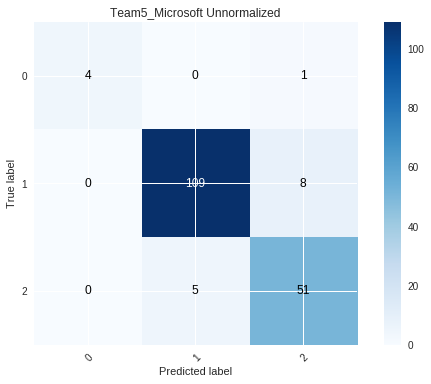

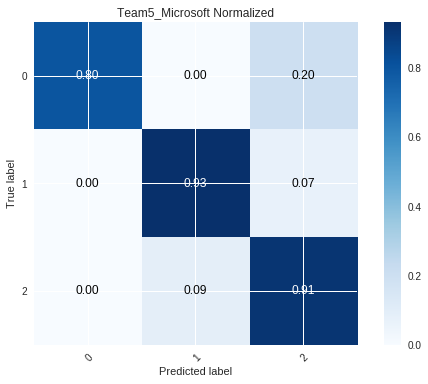

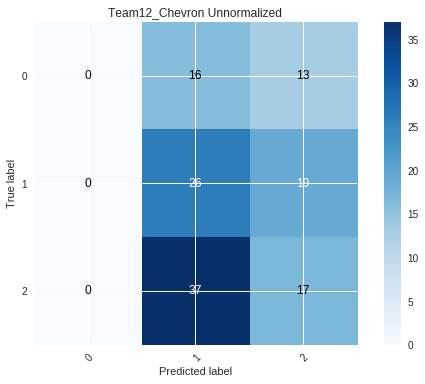

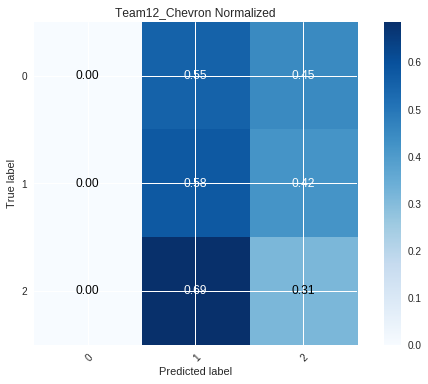

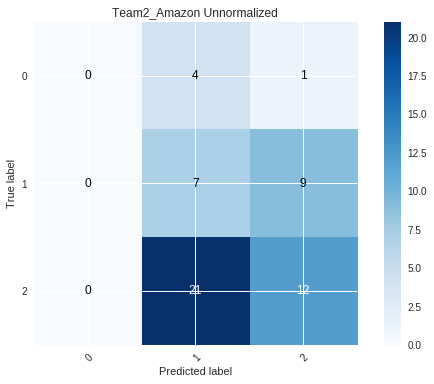

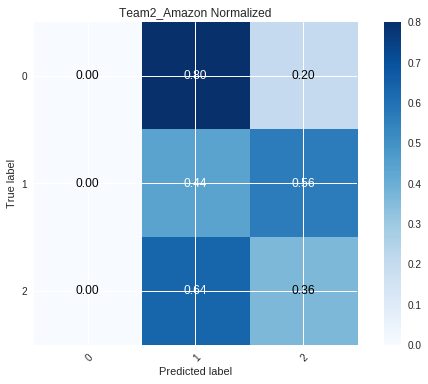

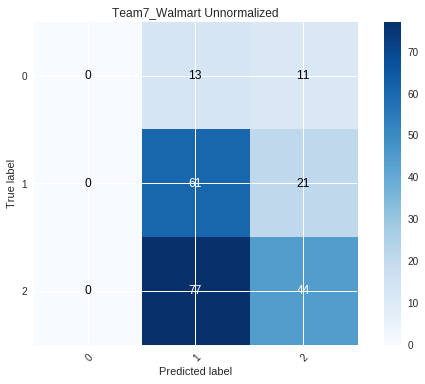

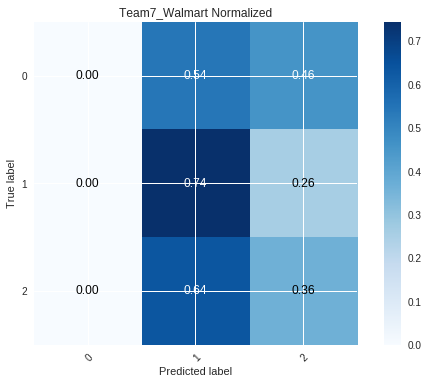

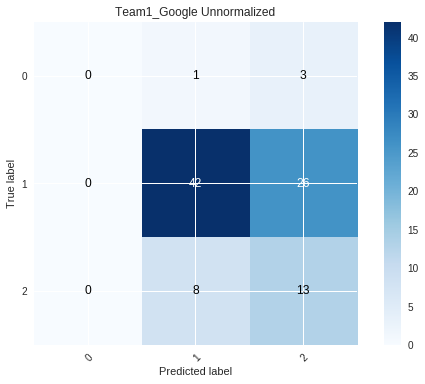

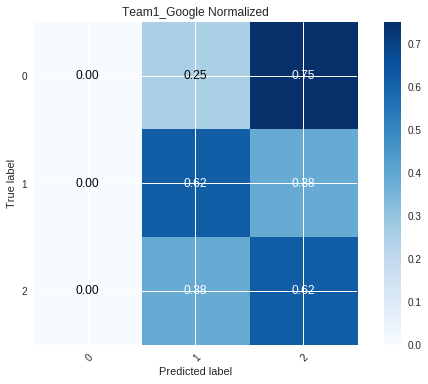

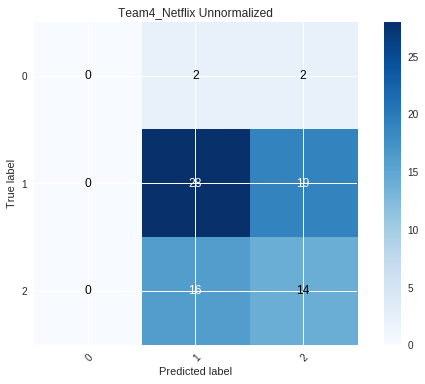

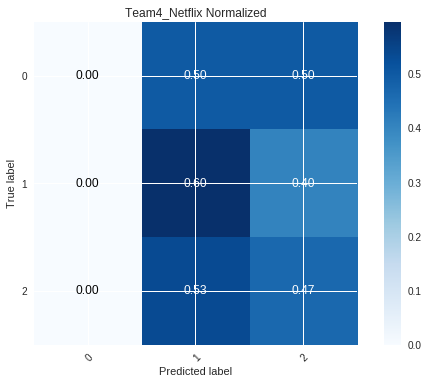

In [13]:
plotTransferedMatrix(fileList)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

def plotTrainedMatrix(filelist,model):
  data = []
  label = []
  for file in filelist:
    filename = ntpath.basename(file)[:-5]
    
    json_file = open(file,'rb')
    json_str = json_file.read().decode(errors='replace')
    data1 = json.loads(json_str)
    texts = list(data1['text'].values())
    labels = list(data1['sentiment'].values())
    
    data =  data + texts
    label = label + labels
    
    labels = []
    for lbl in label:
      if lbl.lower() == 'positive':
        labels.append(1)
      elif lbl.lower() == 'negative':
        labels.append(0)
      else:
        labels.append(2)
      
    labels = keras.utils.to_categorical(labels, 3)
  
  maxlen = 100  # We will cut reviews after 100 words
  training_samples = 200  # We will be training on 200 samples
  validation_samples = 10000  # We will be validating on 10000 samples
  max_words = 10000  # We will only consider the top 10,000 words in the dataset

  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(data)
  sequences = tokenizer.texts_to_sequences(data)

  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  
  data = pad_sequences(sequences, maxlen=maxlen)
  
  X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
  print('Shape of X_train: ', X_train.shape)
  print('Shape of X_test: ', X_test.shape)
  print('Shape of y_train: ', len(y_train))
  print('Shape of y_test: ', len(y_test))
  
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
  
  history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  
  test_loss, test_score = model.evaluate(X_test, y_test)
  print("Loss on test set: ", test_loss)
  print("Accuracy on test set: ", test_score)

Found 5299 unique tokens.
Shape of X_train:  (956, 100)
Shape of X_test:  (240, 100)
Shape of y_train:  956
Shape of y_test:  240
Train on 764 samples, validate on 192 samples
Epoch 1/100
764/764 [==============================] - 1s 942us/step - loss: 0.2517 - acc: 0.9045 - val_loss: 0.2094 - val_acc: 0.9323
Epoch 2/100
764/764 [==============================] - 0s 315us/step - loss: 0.1809 - acc: 0.9415 - val_loss: 0.1969 - val_acc: 0.9392
Epoch 3/100
764/764 [==============================] - 0s 340us/step - loss: 0.1281 - acc: 0.9682 - val_loss: 0.1860 - val_acc: 0.9462
Epoch 4/100
764/764 [==============================] - 0s 327us/step - loss: 0.1117 - acc: 0.9769 - val_loss: 0.3049 - val_acc: 0.8941
Epoch 5/100
764/764 [==============================] - 0s 341us/step - loss: 0.1215 - acc: 0.9769 - val_loss: 0.1908 - val_acc: 0.9462
Epoch 6/100
764/764 [==============================] - 0s 313us/step - loss: 0.0877 - acc: 0.9873 - val_loss: 0.1934 - val_acc: 0.9462
Epoch 7/100
76

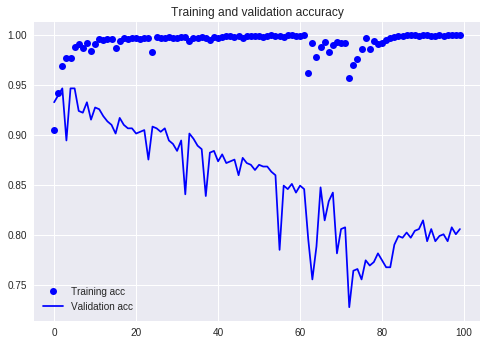

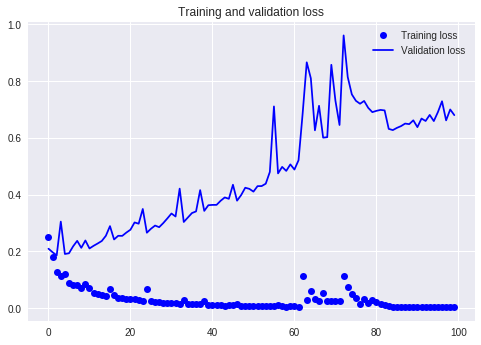

240/240 [==============================] - 0s 424us/step
Loss on test set:  0.7727760295073192
Accuracy on test set:  0.7847222447395324


In [79]:
plotTrainedMatrix(fileList,loaded_model)